# Capstone 3: Making Predictions on Depletion of Five Natural Resources

## EDA

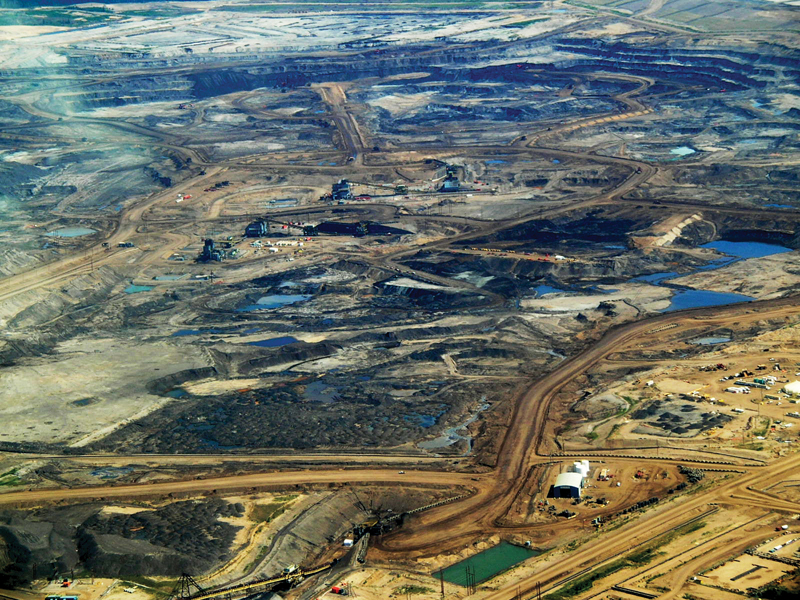

Environmentalism is defined as a concern about and action aimed at protecting the environment. The modern environmental movement started in late 19th century with concerns about protecting the rurals of Europe and the wilderness in the U.S., as well as the health consequences of pollution during the Industrial Revolution [Wikipedia](https://en.wikipedia.org/wiki/Environmentalism#:~:text=The%20movement%20in%20the%20United,Thoreau%20making%20key%20philosophical%20contributions.). Indeed, the Industrial Revolution provided the impetus for modernization. Historically, there have been four industrial revolutions: coal in 1765, gas in 1870, electronics and nuclear in 1969, and internet and renewable energy in 2000 [UpKeep](https://www.onupkeep.com/answers/maintenance-history/four-industrial-revolutions). Each of these revolutions caused great shifts in not only the job industry, lifestyles, and population growth, but impacted the environment tremendously.

This capstone project will discuss the direct and indirect effects of industrialization, modernization, and manufacturing on the availability and distribution of four essential natural resources: coal, oil, natural gas, fresh water, and phosphorus. The aim will be to provide predictive analytics for if and when these resources will be depleted. 

### Data Acquisition

**Sources:**

- https://data.un.org/
- https://www.eia.gov/outlooks/aeo/data/browser/
- https://edg.epa.gov/metadata/catalog/main/home.page
- https://sedac.ciesin.columbia.edu/data/sets/browse?facets=theme%3Aconservation
- https://marketplace.officialstatistics.org/
- https://www.kaggle.com/
- https://asb.opec.org/data/ASB_Data.php


### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats
import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

import re
import mailbox
import csv

In [2]:
#

### Population

One of the biggest concerns in the modern world that is paramount is overpopulation. It affects everything (and not in a good way). Here I'll take a dataset from UNdata that shows an updated data of world population, surface area, and density.

In [3]:
path = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Estimating when four natural resources will be depleted\Datasets\SYB63_1_202105_Population, Surface Area and Density.csv'
world_pop_data = pd.read_csv(path, header=1)
world_pop_data.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Population mid-year estimates (millions),6541.9070,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2005,Population mid-year estimates for males (milli...,3296.4853,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2005,Population mid-year estimates for females (mil...,3245.4217,NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2005,Sex ratio (males per 100 females),101.5734,NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2005,Population aged 0 to 14 years old (percentage),28.1425,NaN,"United Nations Population Division, New York, ..."


In [4]:
world_pop_data.rename({'Unnamed: 1':'Country'}, axis=1, inplace=True) # Rename 2nd column to 'Country'

In [5]:
world_pop_data.head()

,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Population mid-year estimates (millions),6541.9070,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2005,Population mid-year estimates for males (milli...,3296.4853,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2005,Population mid-year estimates for females (mil...,3245.4217,NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2005,Sex ratio (males per 100 females),101.5734,NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2005,Population aged 0 to 14 years old (percentage),28.1425,NaN,"United Nations Population Division, New York, ..."


In [6]:
#world_pop_data['Region/Country/Area'].unique()
#world_pop_data['Footnotes'].unique()
# Just dropping the Region/Country/Area column, keeping the Footnotes for now

In [7]:
# Check
world_pop_data = world_pop_data.drop(columns='Region/Country/Area')
world_pop_data.head()

,Country,Year,Series,Value,Footnotes,Source
0,"Total, all countries or areas",2005,Population mid-year estimates (millions),6541.9070,NaN,"United Nations Population Division, New York, ..."
1,"Total, all countries or areas",2005,Population mid-year estimates for males (milli...,3296.4853,NaN,"United Nations Population Division, New York, ..."
2,"Total, all countries or areas",2005,Population mid-year estimates for females (mil...,3245.4217,NaN,"United Nations Population Division, New York, ..."
3,"Total, all countries or areas",2005,Sex ratio (males per 100 females),101.5734,NaN,"United Nations Population Division, New York, ..."
4,"Total, all countries or areas",2005,Population aged 0 to 14 years old (percentage),28.1425,NaN,"United Nations Population Division, New York, ..."


In [8]:
#world_pop_data['Series'].unique()
# going to make separate dataset later for each Series

In [9]:
world_pop_data.isnull().sum()/len(world_pop_data)

Country      0.000000
Year         0.000000
Series       0.000000
Value        0.000000
Footnotes    0.866957
Source       0.000000
dtype: float64

In [10]:
world_pop_data['Year'].unique()

array([2005, 2010, 2017, 2019, 2000, 2016, 2001, 2011, 2015, 2006, 2014,
       2012, 2008, 2009, 2007, 2004, 2002, 2013, 2003], dtype=int64)

In [11]:
#world_pop_data['Country'].unique()
world_pop_data['Source'].unique()

array(['United Nations Population Division, New York, World Population Prospects: The 2019 Revision, last accessed June 2019.',
       'United Nations Population Division, New York, World Population Prospects: The 2019 Revision; supplemented by data from the United Nations Statistics Division, New York, Demographic Yearbook 2015 and Secretariat for the Pacific Community (SPC) for small countries or areas, last accessed June 2019.',
       'United Nations Statistics Division, New York, "Demographic Yearbook 2015" and the demographic statistics database, last accessed June 2017.'],
      dtype=object)

So the 'Source' column is not necessary for our analysis; however, it's good to record where this data come from so I'll do that now. 

**World Population Data: Sources:**
- United Nations Population Division, New York, World Population Prospects: The 2019 Revision, last accessed June 2019.
- United Nations Population Division, New York, World Population Prospects: The 2019 Revision; supplemented by data from the United Nations Statistics Division, New York, Demographic Yearbook 2015 and Secretariat for the Pacific Community (SPC) for small countries or areas, last accessed June 2019.
- United Nations Statistics Division, New York, "Demographic Yearbook 2015" and the demographic statistics database, last accessed June 2017.

Looks like these were all accessed online.

In [12]:
world_pop_data = world_pop_data.drop(columns='Source')
#world_pop_data.head()

In [13]:
world_pop_data.dtypes

Country       object
Year           int64
Series        object
Value        float64
Footnotes     object
dtype: object

In [14]:
# Data type conversions

# Country
world_pop_data['Country'] = world_pop_data['Country'].astype(pd.StringDtype())

# Series
world_pop_data['Series'] = world_pop_data['Series'].astype(pd.StringDtype())

# Value
world_pop_data['Value'] = world_pop_data['Value'].round(2)

In [15]:
world_pop_data.dtypes

Country       string
Year           int64
Series        string
Value        float64
Footnotes     object
dtype: object

In [16]:
world_pop_data.head()

,Country,Year,Series,Value,Footnotes
0,"Total, all countries or areas",2005,Population mid-year estimates (millions),6541.91,NaN
1,"Total, all countries or areas",2005,Population mid-year estimates for males (milli...,3296.49,NaN
2,"Total, all countries or areas",2005,Population mid-year estimates for females (mil...,3245.42,NaN
3,"Total, all countries or areas",2005,Sex ratio (males per 100 females),101.57,NaN
4,"Total, all countries or areas",2005,Population aged 0 to 14 years old (percentage),28.14,NaN


#### Adding Continent Column

In [17]:
i = world_pop_data[((world_pop_data.Country == 'Total, all countries or areas'))].index # Find index for 'total, all countires or areas' so I can drop this
i

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
           dtype='int64')

In [18]:
world_pop_data[((world_pop_data.Country == 'Total, all countries or areas'))]

,Country,Year,Series,Value,Footnotes
0,"Total, all countries or areas",2005,Population mid-year estimates (millions),6541.91,NaN
1,"Total, all countries or areas",2005,Population mid-year estimates for males (milli...,3296.49,NaN
2,"Total, all countries or areas",2005,Population mid-year estimates for females (mil...,3245.42,NaN
3,"Total, all countries or areas",2005,Sex ratio (males per 100 females),101.57,NaN
4,"Total, all countries or areas",2005,Population aged 0 to 14 years old (percentage),28.14,NaN
5,"Total, all countries or areas",2005,Population aged 60+ years old (percentage),10.25,NaN
6,"Total, all countries or areas",2005,Population density,50.29,NaN
7,"Total, all countries or areas",2010,Population mid-year estimates (millions),6956.82,NaN
8,"Total, all countries or areas",2010,Population mid-year estimates for males (milli...,3507.70,NaN
9,"Total, all countries or areas",2010,Population mid-year estimates for females (mil...,3449.12,NaN


In [19]:
world_pop_data2 = world_pop_data.drop(i) # Set new variable for this

In [20]:
world_pop_data2.head()

,Country,Year,Series,Value,Footnotes
29,Africa,2005,Population mid-year estimates (millions),916.15,NaN
30,Africa,2005,Population mid-year estimates for males (milli...,456.65,NaN
31,Africa,2005,Population mid-year estimates for females (mil...,459.51,NaN
32,Africa,2005,Sex ratio (males per 100 females),99.38,NaN
33,Africa,2005,Population aged 0 to 14 years old (percentage),41.87,NaN


In [21]:
africa = world_pop_data2[((world_pop_data2.Country == 'Africa'))]

In [22]:
asia = world_pop_data2[((world_pop_data2.Country == 'Asia'))]

In [25]:
africa_asia = africa.append(asia, ignore_index=True)

In [26]:
southamerica = world_pop_data2[((world_pop_data2.Country == 'South America'))]

In [27]:
europe = world_pop_data2[((world_pop_data2.Country == 'Europe'))]

In [28]:
southamer_euro = southamerica.append(europe, ignore_index=True)

In [30]:
oceania = world_pop_data2[((world_pop_data2.Country == 'Oceania'))]

In [31]:
northamerica = world_pop_data2[((world_pop_data2.Country == 'Northern America'))]

In [33]:
first_four = africa_asia.append(southamer_euro, ignore_index=True)

In [38]:
centralamerica = world_pop_data2[((world_pop_data2.Country == 'Central America'))]

In [39]:
australianewzeal = world_pop_data2[((world_pop_data2.Country == 'Australia and New Zealand'))]

In [40]:
northamer_oceania = oceania.append(northamerica, ignore_index=True)

In [41]:
centralamer_ausnewz = centralamerica.append(australianewzeal, ignore_index=True)

In [43]:
second_four = northamer_oceania.append(centralamer_ausnewz, ignore_index=True)

In [44]:
world_pop_continents = first_four.append(second_four, ignore_index=True)

In [45]:
len(world_pop_continents)

232

In [46]:
world_pop_continents.head()

,Country,Year,Series,Value,Footnotes
0,Africa,2005,Population mid-year estimates (millions),916.15,NaN
1,Africa,2005,Population mid-year estimates for males (milli...,456.65,NaN
2,Africa,2005,Population mid-year estimates for females (mil...,459.51,NaN
3,Africa,2005,Sex ratio (males per 100 females),99.38,NaN
4,Africa,2005,Population aged 0 to 14 years old (percentage),41.87,NaN


#### Separate dataset: Country, Year, Value

In [47]:
country_year_val = world_pop_continents[['Country','Year','Value']]
country_year_val.head()

,Country,Year,Value
0,Africa,2005,916.15
1,Africa,2005,456.65
2,Africa,2005,459.51
3,Africa,2005,99.38
4,Africa,2005,41.87


In [48]:
# Convert Year to datetime
country_year_val['Year'] = pd.to_datetime(country_year_val.Year, format='%Y')

<ipython-input-48-7fd72f5aa4bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_year_val['Year'] = pd.to_datetime(country_year_val.Year, format='%Y')


In [49]:
# Check max and min values for 'Value' column
country_year_val.Value.max()

31915.0

In [50]:
country_year_val.Value.min()

3.06

In [51]:
len(country_year_val)

232

In [52]:
country_year_val.isnull().sum()/len(country_year_val)

Country    0.0
Year       0.0
Value      0.0
dtype: float64

In [53]:
# Making separate dataframe again
pivot_table = country_year_val.pivot_table(index=['Country', 'Year'])
pivot_table.head()

Value
Country Year                   
Africa  2005-01-01   287.081429
        2010-01-01   322.820000
        2017-01-01  4123.433750
        2019-01-01   400.871429
Asia    2005-01-01  1175.098571

In [54]:
pivot_table.dropna()

Value
Country                   Year                   
Africa                    2005-01-01   287.081429
                          2010-01-01   322.820000
                          2017-01-01  4123.433750
                          2019-01-01   400.871429
Asia                      2005-01-01  1175.098571
                          2010-01-01  1242.235714
                          2017-01-01  5154.966250
                          2019-01-01  1356.024286
Australia and New Zealand 2005-01-01    26.864286
                          2010-01-01    27.694286
                          2017-01-01  1026.633750
                          2019-01-01    29.050000
Central America           2005-01-01    69.802857
                          2010-01-01    73.562857
                          2017-01-01   378.922500
                          2019-01-01    80.192857
Europe                    2005-01-01   231.564286
                          2010-01-01   233.780000
                          2017-01-01  3088.395000
                          2019-01-01   237.538571
Northern America          2005-01-01   115.287143
                          2010-01-01   120.145714
                          2017-01-01  2832.186250
                          2019-01-01   127.391429
Oceania                   2005-01-01    30.081429
                          2010-01-01    31.140000
                          2017-01-01  1098.935000
                          2019-01-01    32.911429
South America             2005-01-01   128.662857
                          2010-01-01   134.561429
                          2017-01-01  2353.653750
                          2019-01-01   144.600000

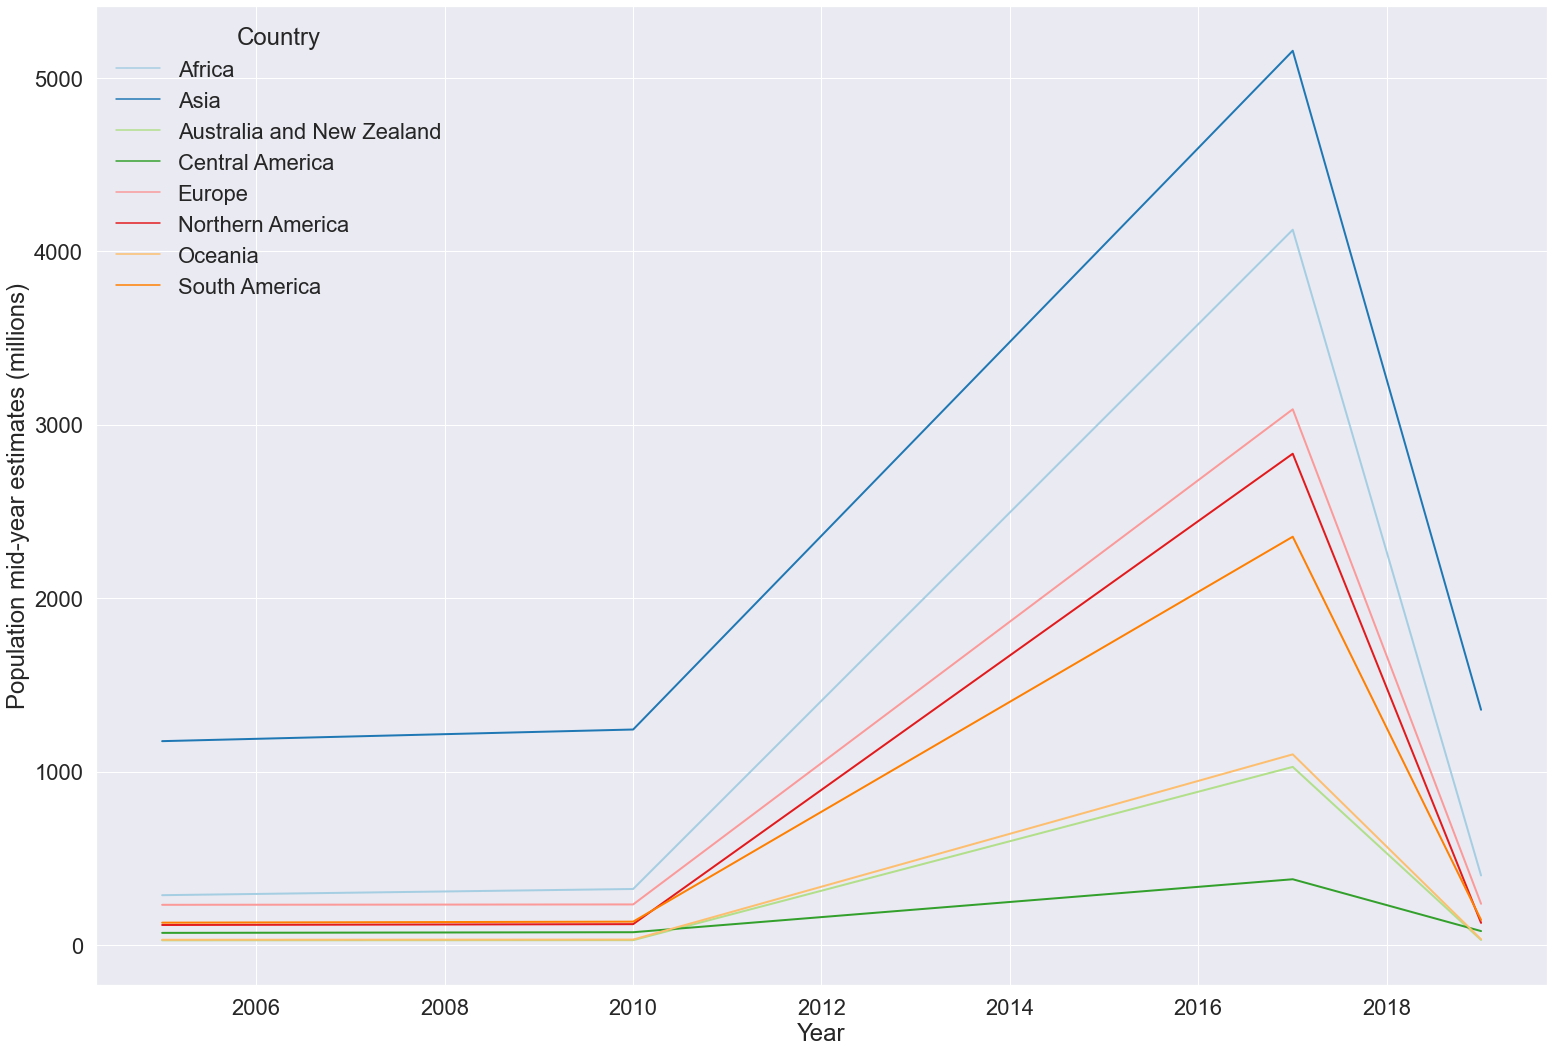

In [62]:
plt.style.use('seaborn')
plt.figure(figsize=(26,18))
sns.set(font_scale = 2)
sns.lineplot(data=pivot_table.reset_index(), x='Year', y='Value', hue='Country', palette='Paired', linewidth= 2.0)
plt.ylabel('Population mid-year estimates (millions)')
plt.show()

### I. Coal

**Context:**

Coal can be extracted from the earth either via surface mining or underground mining. If it is located less than 61 meters underground, it can be extracted by surface mining. However, most of the world's coal reserves are buried deep, deep underground (like 300 meters), and this is where underground mining is ideal (or aka deep mining). Coal provides steam and power needed to mass-produce items, generate electricity, generate heat, fuel steamships, and fuel the stell industry. 

Coal is an attractive source due to the fact that it is cheap and provides thousands and millions of job opportunities as lots of people are required in the coal extracting, burning, and disposal proceses. However, it is responsible for a multitude of environmental damages. One, burning it in electric power plants emits tons of carbon dioxide (in the U.S. alone, it generates singlehandedly 42% of dangerous mercury emissions, two-thirds of U.S. sulfur dioxide - contributing to acid rain - and generating particulate matter in the air) [NRDC](https://www.nrdc.org/stories/fossil-fuels-dirty-facts). Two, it is a great disturbance to the land and affects the chemistry of rainwater runoff. And if CO2 and SO2 weren't enough, it also releases substantial amounts of methane. 

Before going on about the harms of coal, here is a data from the Global Power Plant Database, last updated June 2021. The Global Plant Database collects the following characteristics and indicators:
- All types of fuel
- Technical characteristics (fuel, technology, ownership)
- Operational characteristics (generation)
- Plant's geolocation
- Plants over 1 megawatt (MW)
- Plants in operation only (in first iteration)

In [71]:
path2 = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Estimating when four natural resources will be depleted\global_power_plant_database.csv'
power_plant_data = pd.read_csv(path2)
power_plant_data.head()

D:\User\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [77]:
power_plant_data['primary_fuel'].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [72]:
coal_data = power_plant_data[((power_plant_data.primary_fuel == 'Coal'))]
coal_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
119,ARG,Argentina,CENTRAL BAHIA BLANCA (PIEDRA BUENA) SA,ARG0000031,620.0,-38.7872,-62.2536,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,3213.44,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
126,ARG,Argentina,CENTRAL TERMICA GÜEMES SA,ARG0000287,361.0,-24.6894,-65.0425,Coal,Gas,NaN,...,NaN,NaN,NaN,NaN,1871.05,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
141,ARG,Argentina,COSTANERA,ARG0000046,1982.2,-34.6260,-58.3393,Coal,Gas,Other,...,NaN,NaN,NaN,NaN,10273.70,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
164,ARG,Argentina,CT ECOENERGIA (PETROBRAS),ARG0000032,13.2,-38.6871,-62.3961,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,68.41,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
268,ARG,Argentina,NECOCHEA,ARG0000008,206.0,-38.5785,-58.7108,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,1067.69,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [73]:
coal_data = coal_data.drop(columns='other_fuel1')
coal_data = coal_data.drop(columns='other_fuel2')
coal_data = coal_data.drop(columns='other_fuel3')

In [74]:
coal_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
119,ARG,Argentina,CENTRAL BAHIA BLANCA (PIEDRA BUENA) SA,ARG0000031,620.0,-38.7872,-62.2536,Coal,1990.0,PAMPA ENERGIA,...,NaN,NaN,NaN,NaN,3213.44,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
126,ARG,Argentina,CENTRAL TERMICA GÜEMES SA,ARG0000287,361.0,-24.6894,-65.0425,Coal,1993.3,PAMPA ENERGIA,...,NaN,NaN,NaN,NaN,1871.05,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
141,ARG,Argentina,COSTANERA,ARG0000046,1982.2,-34.6260,-58.3393,Coal,1983.9,ENDESA COSTANERA,...,NaN,NaN,NaN,NaN,10273.70,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
164,ARG,Argentina,CT ECOENERGIA (PETROBRAS),ARG0000032,13.2,-38.6871,-62.3961,Coal,NaN,PETROBRAS ARGENTINA S.A.,...,NaN,NaN,NaN,NaN,68.41,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
268,ARG,Argentina,NECOCHEA,ARG0000008,206.0,-38.5785,-58.7108,Coal,1968.6,CENTRALES DE LA COSTA ATLANTICA SA,...,NaN,NaN,NaN,NaN,1067.69,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [75]:
coal_data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'wepp_id',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [79]:
coal_data.isnull().sum()/len(coal_data)

country                           0.000000
country_long                      0.000000
name                              0.000000
gppd_idnr                         0.000000
capacity_mw                       0.000000
latitude                          0.000000
longitude                         0.000000
primary_fuel                      0.000000
commissioning_year                0.185837
owner                             0.128326
source                            0.000429
url                               0.000429
geolocation_source                0.000000
wepp_id                           0.346352
year_of_capacity_data             0.766953
generation_gwh_2013               0.869957
generation_gwh_2014               0.802575
generation_gwh_2015               0.741631
generation_gwh_2016               0.739056
generation_gwh_2017               0.745064
generation_gwh_2018               0.793562
generation_gwh_2019               0.878970
generation_data_source            0.722747
estimated_g

### Oil

In [76]:
oil_data = power_plant_data[((power_plant_data.primary_fuel == 'Oil'))]
oil_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
76,AGO,Angola,Biopio,WRI1023002,22.80,-12.4706,13.7319,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,64.92,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
81,AGO,Angola,Huambo,WRI1023006,16.26,-12.7600,15.7500,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,46.30,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
83,AGO,Angola,Luanda Diesel,WRI1023008,58.00,-8.8383,13.2344,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,165.16,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
84,AGO,Angola,Luanda Refinery,WRI1023009,18.50,-8.8383,13.2344,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,52.68,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
85,AGO,Angola,Malongo,WRI1023010,10.00,-5.5500,12.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,28.47,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


### Natural Gas

In [78]:
natural_gas_data = power_plant_data[((power_plant_data.primary_fuel == 'Gas'))]
natural_gas_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
6,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.0,34.5638,69.1134,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
19,DZA,Algeria,Ain Djasser,WRI1023776,520.0,35.8665,6.0262,Gas,Oil,NaN,...,NaN,NaN,NaN,NaN,2171.28,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
25,DZA,Algeria,Annaba,WRI1023795,71.0,36.8924,7.7634,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,296.46,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
27,DZA,Algeria,Arbaa,WRI1023777,560.0,36.5988,3.1375,Gas,Oil,NaN,...,NaN,NaN,NaN,NaN,2338.30,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
29,DZA,Algeria,Boufarik 1,WRI1023792,100.0,36.5914,2.9223,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,417.55,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
